In [16]:
import pandas as pd

In [17]:
#This is the Richmond USGS Data gage
river_richmnd = pd.read_csv('JR_Richmond02037500.csv')

/Users/williampc/opt/anaconda3/envs/geop/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
river_richmnd.dropna()

,agency_cd,site_no,Time,tz_cd,discharge_cfs,discharge_cfs_cd,gage_height_ft,gage_height_ft_cd
375557,USGS,2037500,10/1/07 1:00,EDT,647.0,A,3.20,A
375558,USGS,2037500,10/1/07 1:15,EDT,647.0,A,3.20,A
375559,USGS,2037500,10/1/07 1:30,EDT,647.0,A,3.20,A
375560,USGS,2037500,10/1/07 1:45,EDT,647.0,A,3.20,A
375561,USGS,2037500,10/1/07 2:00,EDT,647.0,A,3.20,A
...,...,...,...,...,...,...,...,...
845921,USGS,2037500,3/12/21 5:30,EST,11000.0,P,6.67,P
845922,USGS,2037500,3/12/21 5:45,EST,11000.0,P,6.67,P
845923,USGS,2037500,3/12/21 6:00,EST,10900.0,P,6.66,P
845924,USGS,2037500,3/12/21 6:15,EST,10900.0,P,6.66,P


In [19]:
#Hurricane data for the basin - Names of Relevant Storms - This will be used for getting the storms from the larger set
JR_stormnames = pd.read_csv('gis_match.csv')
JR_stormnames

,Storm Name
0,BILL
1,ELOISE
2,ALMA
3,CLAUDETTE
4,ABLE
...,...
127,CHRIS
128,ISABEL
129,ISIDORE
130,DENNIS


In [20]:
# #plotting some data

# import matplotlib
# import matplotlib.pyplot as plt
# import numpy as np

# # Data for plotting
# time = river_richmnd['Time']
# dischg = river_richmnd['discharge_cfs']

# fig, ax = plt.subplots()
# ax.plot(time, dischg)

# ax.set(xlabel='time (YY/mm/dd)', ylabel='discharge (cfs)',
#        title='James River at Richmond')
# ax.grid()

# #fig.savefig("test.png")
# plt.show()

In [21]:
# Bring in the Big HURDAT data, from 1950 forward (satellites and data quality, etc.)
HURDAT = pd.read_csv('hurdatcleanva_1950_present.csv')
HURDAT

,Storm Number,Storm Name,Storm Status,Lat,Lon,Time,Maxspeed
0,AL021952,ABLE,TS,36.6,-79.9,9/1/52 0:00,40
1,AL021952,ABLE,TS,38.1,-78.6,9/1/52 6:00,45
2,AL021952,ABLE,TS,39.5,-77.1,9/1/52 12:00,50
3,AL031952,UNNAMED,TD,37.5,-82.3,8/28/52 18:00,20
4,AL031953,BARBARA,HU,36.1,-75.9,8/14/53 9:00,70
...,...,...,...,...,...,...,...
154,AL062018,FLORENCE,EX,37.8,-82.0,9/17/18 12:00,25
155,AL062018,FLORENCE,EX,38.8,-82.0,9/17/18 18:00,25
156,AL062018,FLORENCE,EX,39.5,-80.5,9/18/18 0:00,25
157,AL142018,MICHAEL,EX,36.5,-77.7,10/12/18 0:00,50


In [22]:
VA_JR_stormmatch = JR_stormnames.merge(HURDAT)
VA_JR_stormmatch

,Storm Name,Storm Number,Storm Status,Lat,Lon,Time,Maxspeed
0,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20
1,BILL,AL032003,EX,37.3,-79.5,7/3/03 0:00,20
2,BILL,AL022015,LO,38.5,-83.7,6/20/15 18:00,15
3,BILL,AL022015,LO,38.9,-81.3,6/21/15 0:00,15
4,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20
...,...,...,...,...,...,...,...
347,ISABEL,AL132003,TS,38.6,-78.9,9/19/03 6:00,50
348,ISABEL,AL132003,HU,36.7,-77.7,9/19/03 0:00,65
349,ISABEL,AL132003,TS,38.6,-78.9,9/19/03 6:00,50
350,NESTOR,AL162019,EX,37.0,-76.7,10/20/19 18:00,40


In [23]:
# Now the common storms for the James Basin have been created. We now have time and storms together for the basin
#checking some things about the data

In [24]:
# How many unique storms within the basin since 1950? 62 here and 53 in the Data on the Coast.NOAA.gov's website. 
#I think we are close enough here, digging may show some other storms, but I think we have at least captured the ones 
#from NOAA
len(VA_JR_stormmatch['Storm Number'].unique())

62

In [25]:
#double ck the lat and long parameters
print(VA_JR_stormmatch['Lat'].min(),
VA_JR_stormmatch['Lon'].min(),
VA_JR_stormmatch['Lat'].max(),
VA_JR_stormmatch['Lon'].max())

36.1 -83.7 39.9 -75.1


In [26]:
#Make a csv of this data
VA_JR_stormmatch.to_csv('storms_in_basin.csv', sep=',',encoding = 'utf-8')

In [27]:
VA_JR_stormmatch


,Storm Name,Storm Number,Storm Status,Lat,Lon,Time,Maxspeed
0,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20
1,BILL,AL032003,EX,37.3,-79.5,7/3/03 0:00,20
2,BILL,AL022015,LO,38.5,-83.7,6/20/15 18:00,15
3,BILL,AL022015,LO,38.9,-81.3,6/21/15 0:00,15
4,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20
...,...,...,...,...,...,...,...
347,ISABEL,AL132003,TS,38.6,-78.9,9/19/03 6:00,50
348,ISABEL,AL132003,HU,36.7,-77.7,9/19/03 0:00,65
349,ISABEL,AL132003,TS,38.6,-78.9,9/19/03 6:00,50
350,NESTOR,AL162019,EX,37.0,-76.7,10/20/19 18:00,40


In [48]:
#names of storms 
len(VA_JR_stormmatch['Storm Number'].unique())
VA_JR_stormmatch['Storm Number'].unique()
numbers = VA_JR_stormmatch['Storm Number']

In [71]:
#grab a storm from this list and lok at the times
#Bill = pd.DataFrame(VA_JR_stormmatch['Storm Number'=='AL032003'])

Bill = VA_JR_stormmatch[(VA_JR_stormmatch["Storm Number"] == 'AL032003')]
Bill
#so this is the data for a storm named Bill that had a pth through the basin * BILL WAS A BACKDOOR Storm

,Storm Name,Storm Number,Storm Status,Lat,Lon,Time,Maxspeed
0,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20
1,BILL,AL032003,EX,37.3,-79.5,7/3/03 0:00,20
4,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20
5,BILL,AL032003,EX,37.3,-79.5,7/3/03 0:00,20


15177.142857142857


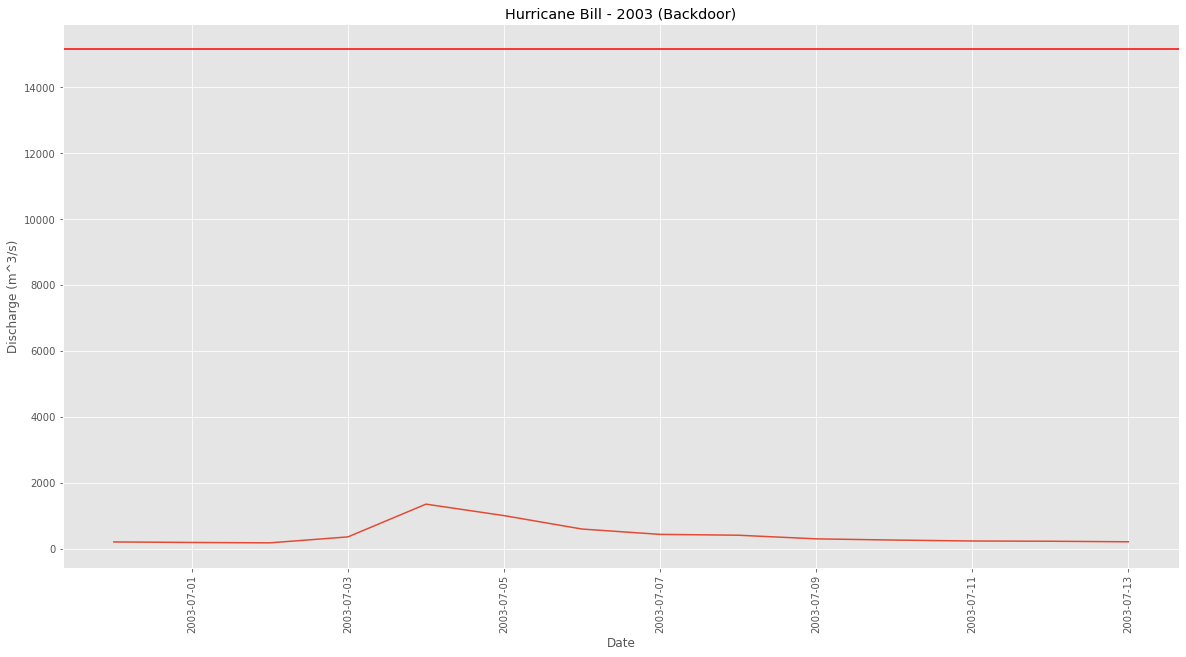

In [99]:
# plotting for the USGS river Gage data 
import matplotlib
import matplotlib.pyplot as plt
from climata.usgs import DailyValueIO
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
import numpy as np

register_matplotlib_converters()
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20.0, 10.0)
# set parameters
nyears = 1
ndays = 365 * nyears
station_id = "02037500"
param_id = "00060"

datelist = pd.date_range(end=datetime.today(), periods=ndays).tolist()
#take an annual average for the river
annual_data = DailyValueIO(
    start_date="2003-01-01",
    end_date="2004-01-01",
    station=station_id,
    parameter=param_id,)
for series in data:
    flow = [r[1] for r in series.data]
    si_flow_annual = np.asarray(flow) * 0.0283168
    si_flow_ma = np.mean(flow)
    print(si_flow_ma)
#now for the storm - Bill    
data = DailyValueIO(
    start_date="2003-06-30",
    end_date="2003-07-13",
    station=station_id,
    parameter=param_id,)
# create lists of date-flow values
for series in data:
    flow = [r[1] for r in series.data]
    #si_flow = [float(item) for item in flow*0.0283]
    si_flow = np.asarray(flow) * 0.0283168
    dates = [r[0] for r in series.data]
plt.plot(dates, si_flow)
plt.axhline(y=si_flow_ma, color='r', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Discharge (m^3/s)')
plt.title("Hurricane Bill - 2003 (Backdoor)")
plt.xticks(rotation='vertical')
plt.show()

In [67]:
# now to merge the River Data with this James River Data
river_hurdatvrjr = VA_JR_stormmatch.merge(river_richmnd)

In [29]:
river_hurdatvrjr

,Storm Name,Storm Number,Storm Status,Lat,Lon,Time,Maxspeed,agency_cd,site_no,tz_cd,discharge_cfs,discharge_cfs_cd,gage_height_ft,gage_height_ft_cd
0,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20,USGS,2037500,EDT,6550.0,A:[91],NaN,NaN
1,BILL,AL032003,EX,36.5,-82.0,7/2/03 18:00,20,USGS,2037500,EDT,6550.0,A:[91],NaN,NaN
2,BILL,AL032003,EX,37.3,-79.5,7/3/03 0:00,20,USGS,2037500,EDT,6690.0,A:[91],NaN,NaN
3,BILL,AL032003,EX,37.3,-79.5,7/3/03 0:00,20,USGS,2037500,EDT,6690.0,A:[91],NaN,NaN
4,BILL,AL022015,LO,38.5,-83.7,6/20/15 18:00,15,USGS,2037500,EDT,2180.0,A,4.01,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,ISABEL,AL132003,HU,36.7,-77.7,9/19/03 0:00,65,USGS,2037500,EDT,11200.0,A:[91],NaN,NaN
125,ISABEL,AL132003,TS,38.6,-78.9,9/19/03 6:00,50,USGS,2037500,EDT,21200.0,A:[91],NaN,NaN
126,ISABEL,AL132003,TS,38.6,-78.9,9/19/03 6:00,50,USGS,2037500,EDT,21200.0,A:[91],NaN,NaN
127,NESTOR,AL162019,EX,37.0,-76.7,10/20/19 18:00,40,USGS,2037500,EDT,2290.0,A,4.07,A


In [31]:
# the above is because names are only retired if they are deadly. however we can use the storm number to distinguish
len(river_hurdatvrjr["Storm Number"].unique())

27

In [32]:
# we need to get this done storm by storm to see the discharge 10 days surrounding the storm's arrival.
# we  select Hurricane Florence as a test case for an Atlantic Storm
